In [1]:
import numpy as np
import os
import math

In [2]:
import matplotlib.pyplot as plt
import librosa
import librosa.display as display

In [3]:
cd ../

/mnt/Stuff/Acads/UGP/mycode


In [4]:
sr = 22050

In [5]:
path = '/mnt/data/datasets/outs/'
dest = '/mnt/data/datasets/outs_hf/'

In [ ]:
for f in os.listdir(path):
    hf = np.load(path + f)['arr_5']
    np.save(dest + f[:-1] + 'y' , hf)
    print(f)

In [5]:
total = 0

In [6]:
for f in os.listdir(dest):
    hf = np.load(dest + f)
    total = total + math.floor(hf.shape[1]/1000)

In [9]:
total*0.2/16

20.725

In [9]:
def song(sp, gp):

    HF0 = np.load(sp)
    if True in np.isnan(HF0):
        print('dafaq')
    #HF0 = HF0['arr_0']
    ground = np.load(gp)
    #print(gp)
    T = HF0.shape[1]
    # if T != ground.shape[0]:
    #     print(T, ground.shape[0])
    #     print('ground dimension error')

    gr = np.zeros([61,T])
    for t in range(T):
        if ground[t] != 0:
            gr[int(ground[t]) , t] = 1
            #print(int(ground[t] ))

    patches_size = 50
    number_of_patches = math.floor(T/patches_size)
    # print(number_of_patches)

    x = np.zeros([number_of_patches,patches_size,301])
    y = np.zeros([number_of_patches,patches_size,61])

    j = 0
    for i in range(T):
        if i%patches_size == 0 and i !=0:
            j+=1
        if j +1 == number_of_patches:
            break
        x[j] = np.swapaxes(HF0[:,i:i+patches_size] , 0 , 1)
        y[j] = np.swapaxes(gr[:,i:i+patches_size] , 0,1)
    # print(y.shape)
    return x , y

In [10]:
def generator(names):
    sp = '/mnt/data/datasets/outs_hf/out_'
    gp = 'ground/'
    indices = np.arange(names.shape[0])
    while True:
        np.random.shuffle(indices)

        # if train:
        #     names = train_names
        # else:
        #     names = val_names
        count=0
        batch_size = 16
        patch_size = 50
        number_of_patches = 20
        x_train_batch = np.zeros([batch_size , number_of_patches , patch_size , 301 , 1 ])
        y_train_batch = np.zeros([batch_size , patch_size * number_of_patches , 61])
        batch_count = 0
        for i in indices:
            name = names[i]
            x, y = song(sp + name[:-1] + 'y', gp + name[:-1] + 'y')



            i = 0
            while (i+1)*number_of_patches <= x.shape[0]:
                #count+=1


                x_train = np.reshape(
                            x[i*number_of_patches : (i+1)*number_of_patches,:,:] ,
                            [number_of_patches , patch_size , 301 , 1 ])
                y_train = np.zeros([number_of_patches * patch_size , 61])
                for j in range(number_of_patches):
                    y_train[j*patch_size : (j+1)*patch_size,  : ] = y[i+j]

                #print(y_train.shape)
                y_train = np.reshape(
                            y_train, [number_of_patches * patch_size , 61])

                i+=1

                if batch_count < batch_size:
                    x_train_batch[batch_count] = x_train
                    y_train_batch[batch_count] = y_train
                    batch_count +=1
                else:
                    count+=1
                    batch_count = 0
                    
                    #yield x_train_batch, y_train_batch


        print()
        print(count)
        break
        print()

In [11]:
names = np.load('names.npy')
l = names.shape[0]
train_names = names#[:int(0.8*l)]
val_names = names[int(0.8*l):]
generator(train_names)


97


In [77]:
x.shape

(66, 200, 301)

In [53]:
y.shape

(25, 200, 61)

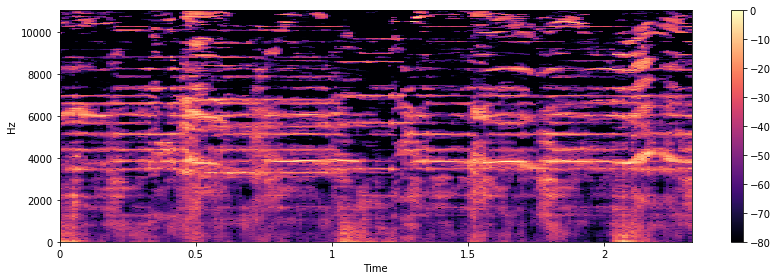

In [80]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(np.swapaxes(x[10, :,:], 0 , 1), ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

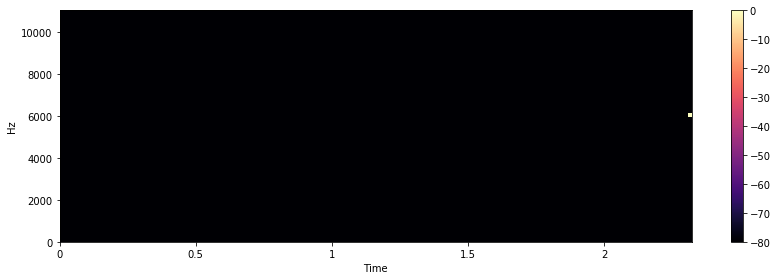

In [79]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(np.swapaxes(y[0,:,:] , 0 , 1), ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()